<a href="https://colab.research.google.com/github/Ad0420/AI-ML/blob/main/muffinVDog_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
IMAGE_SIZE = [224,224]

test_path = '/content/drive/MyDrive/dataset/test'
train_path = '/content/drive/MyDrive/dataset/train'


In [4]:
import os
path, dirs, files = next(os.walk('/content/drive/MyDrive/dataset/train/chihuahua'))
file_count = len(files)
print("number of images: ", file_count)

number of images:  2559


Printing the name of images

In [5]:
file_name = os.listdir('/content/drive/MyDrive/dataset/train/muffin')
print(file_name)

['img_2_825.jpg', 'img_2_894.jpg', 'img_2_32.jpg', 'img_2_620.jpg', 'img_2_772.jpg', 'img_2_534.jpg', 'img_2_775.jpg', 'img_2_260.jpg', 'img_2_906.jpg', 'img_2_903.jpg', 'img_2_813.jpg', 'img_2_690.jpg', 'img_2_643.jpg', 'img_2_583.jpg', 'img_2_609.jpg', 'img_2_873.jpg', 'img_2_81.jpg', 'img_2_405.jpg', 'img_2_786.jpg', 'img_2_831.jpg', 'img_2_330.jpg', 'img_2_9.jpg', 'img_2_547.jpg', 'img_2_272.jpg', 'img_2_360.jpg', 'img_2_701.jpg', 'img_2_419.jpg', 'img_2_800.jpg', 'img_2_350.jpg', 'img_2_879.jpg', 'img_2_248.jpg', 'img_2_343.jpg', 'img_2_34.jpg', 'img_2_465.jpg', 'img_2_362.jpg', 'img_2_860.jpg', 'img_2_870.jpg', 'img_2_418.jpg', 'img_2_866.jpg', 'img_2_30.jpg', 'img_2_953.jpg', 'img_3_1069.jpg', 'img_3_1084.jpg', 'img_2_993.jpg', 'img_3_132.jpg', 'img_3_1297.jpg', 'img_3_1178.jpg', 'img_3_264.jpg', 'img_3_103.jpg', 'img_2_97.jpg', 'img_3_100.jpg', 'img_3_1262.jpg', 'img_2_936.jpg', 'img_3_138.jpg', 'img_3_1290.jpg', 'img_3_1142.jpg', 'img_3_270.jpg', 'img_3_102.jpg', 'img_3_1184.j

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

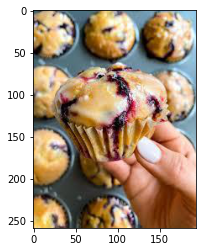

In [7]:
img = mpimg.imread('/content/drive/MyDrive/dataset/train/muffin/img_2_825.jpg')
imgplt = plt.imshow(img)
plt.show()

In [8]:
os.mkdir('/content/image_resized')

In [9]:
original_folder_muffin = '/content/drive/MyDrive/dataset/train/muffin/'
resized_folder = '/content/image_resized/'

for i in range (2000):
  filename = os.listdir(original_folder_muffin)[i]
  img_path = original_folder_muffin + filename
  
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

In [28]:
count = os.listdir('/content/image_resized/')
print(len(count))

3247


In [26]:
original_folder_chihuahua = '/content/drive/MyDrive/dataset/train/chihuahua/'
resized_folder = '/content/image_resized/'

for i in range (2000):
  filename = os.listdir(original_folder_chihuahua)[i]
  img_path = original_folder_chihuahua + filename
  
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

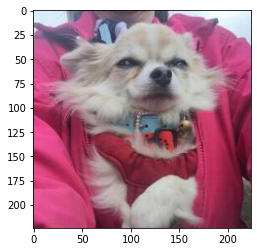

In [29]:
img = mpimg.imread('/content/image_resized/img_2_825.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating Labels

Muffin ---- 0
Chihuahua ---- 1


In [30]:
filenames = os.listdir('/content/image_resized/')

labels = []

for i in range (3247):
  if (i < 1600):
    labels.append(0)
  
  if ((i >= 1600) and (i <= 3247)):
    labels.append(1)



In [31]:
print(labels[0:5])
print(len(filenames))

[0, 0, 0, 0, 0]
3247


In [32]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1600 1647]


In [33]:
import cv2
import glob

In [34]:
image_directory = ('/content/image_resized/')
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
muffin_chihuahua_images = np.array([cv2.imread(file) for file in files])

In [35]:
print(muffin_chihuahua_images)

[[[[145 132 110]
   [148 135 113]
   [153 140 118]
   ...
   [189 154 111]
   [170 132  90]
   [207 169 127]]

  [[147 134 112]
   [150 137 115]
   [155 142 120]
   ...
   [220 185 142]
   [161 123  81]
   [219 182 138]]

  [[150 137 115]
   [153 140 118]
   [158 145 123]
   ...
   [241 206 162]
   [174 139  95]
   [198 164 118]]

  ...

  [[220 234 232]
   [220 234 232]
   [220 234 232]
   ...
   [ 78  84  73]
   [ 82  90  80]
   [ 90  98  88]]

  [[221 235 233]
   [221 235 233]
   [221 235 233]
   ...
   [ 84  90  79]
   [ 87  95  85]
   [ 94 102  92]]

  [[222 236 234]
   [222 236 234]
   [222 236 234]
   ...
   [ 86  92  81]
   [ 82  90  80]
   [ 82  90  80]]]


 [[[ 51  42  32]
   [ 59  50  40]
   [ 41  29  19]
   ...
   [137 135 147]
   [144 140 151]
   [147 143 154]]

  [[ 56  47  37]
   [ 67  58  48]
   [ 84  74  64]
   ...
   [139 137 149]
   [145 141 152]
   [148 144 155]]

  [[144 137 128]
   [157 148 139]
   [177 168 159]
   ...
   [148 144 155]
   [152 148 159]
   [154 150

In [36]:
type(muffin_chihuahua_images)

numpy.ndarray

In [37]:
print(muffin_chihuahua_images.shape)

(3247, 224, 224, 3)


In [38]:
X = muffin_chihuahua_images
Y = np.asarray(labels)

TRAIN TEST SPLIT

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(3247, 224, 224, 3) (2597, 224, 224, 3) (650, 224, 224, 3)


In [41]:
X_train_scaled = X_train/225

X_test_scaled = X_test/225

In [42]:
print(X_train_scaled)

[[[[0.36444444 0.53333333 0.61333333]
   [0.36444444 0.53333333 0.61333333]
   [0.36444444 0.53333333 0.61333333]
   ...
   [0.45333333 0.58666667 0.66222222]
   [0.44888889 0.58222222 0.65777778]
   [0.44444444 0.57777778 0.65333333]]

  [[0.37333333 0.54222222 0.62222222]
   [0.37333333 0.54222222 0.62222222]
   [0.37333333 0.54222222 0.62222222]
   ...
   [0.44888889 0.58222222 0.65777778]
   [0.44444444 0.57777778 0.65333333]
   [0.43555556 0.56888889 0.64444444]]

  [[0.40444444 0.56       0.64888889]
   [0.40888889 0.56444444 0.65333333]
   [0.39555556 0.56       0.64888889]
   ...
   [0.43555556 0.56888889 0.64444444]
   [0.43111111 0.56444444 0.64      ]
   [0.42666667 0.56       0.63555556]]

  ...

  [[0.62666667 0.81777778 0.85777778]
   [0.58666667 0.79555556 0.81333333]
   [0.51111111 0.73333333 0.73333333]
   ...
   [0.52888889 0.68       0.73777778]
   [0.56444444 0.71111111 0.77777778]
   [0.44       0.59555556 0.65777778]]

  [[0.56       0.76444444 0.8       ]
   [0.5

BUILDING NEURAL NETWORK

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [44]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)

In [45]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [47]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
82/82 [==============================] - 89s 1s/step - loss: 0.8181 - acc: 0.4925
Epoch 2/5
82/82 [==============================] - 77s 938ms/step - loss: 0.7440 - acc: 0.5229
Epoch 3/5
82/82 [==============================] - 81s 986ms/step - loss: 0.6973 - acc: 0.5757
Epoch 4/5
82/82 [==============================] - 77s 944ms/step - loss: 0.6785 - acc: 0.5945
Epoch 5/5
82/82 [==============================] - 81s 984ms/step - loss: 0.6555 - acc: 0.6099


In [48]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss =', score)
print('Test accuracy =', acc)

21/21 [==============================] - 22s 970ms/step - loss: 0.7821 - acc: 0.4723
Test loss = 0.7821360230445862
Test accuracy = 0.4723076820373535
